In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
data = pd.read_excel("Pesquisa de Interesse _ Realização de Evento (Responses).xlsx")
data["RA"].value_counts()
print("Length of series = 278, with repeated values that should be unique.")

Length of series = 278, with repeated values that should be unique.


In [40]:
data = data.drop_duplicates("RA")
data["RA"].value_counts()
print("Legnth of series still = 278, but with no repeated values.")

Legnth of series still = 278, but with no repeated values.


In [41]:
data = data.drop(["Timestamp"], axis=1)
data.head()

,RA,Gênero,Idade,Curso,Qual tipo de evento você gostaria que fosse organizado? (pode marcar mais de uma opção),Horário do evento,Sugestões (pergunta não obrigatória)
0,24101293,Mulher,21 - 25,Economia,"Workshop / Palestra, Festival Gastronômico de ...","Tarde, Noite",NaN
1,24201046,Homem,21 - 25,Economia,"Workshop / Palestra, Mostra de Cinema","Tarde, Noite",NaN
2,2111007,Homem,21 - 25,Economia,"Workshop / Palestra, Festival Gastronômico de ...",Noite,eventos clássicos para network com bebida e af...
3,24207310,Homem,21 - 25,Administração,Festival Gastronômico de Bebidas,Tarde,NaN
4,2311122,Mulher,18 - 20,Economia,"Workshop / Palestra, Festival Gastronômico de ...","Tarde, Noite",NaN


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 302
Data columns (total 7 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   RA                                                                                       278 non-null    int64 
 1   Gênero                                                                                   278 non-null    object
 2   Idade                                                                                    278 non-null    object
 3   Curso                                                                                    278 non-null    object
 4   Qual tipo de evento você gostaria que fosse organizado? (pode marcar mais de uma opção)  278 non-null    object
 5   Horário do evento                                                            

In [44]:
data.columns = ["RA","gender","age_range","major","event_type","event_time","comments"]
data.head()

,RA,gender,age_range,major,event_type,event_time,comments
0,24101293,Mulher,21 - 25,Economia,"Workshop / Palestra, Festival Gastronômico de ...","Tarde, Noite",NaN
1,24201046,Homem,21 - 25,Economia,"Workshop / Palestra, Mostra de Cinema","Tarde, Noite",NaN
2,2111007,Homem,21 - 25,Economia,"Workshop / Palestra, Festival Gastronômico de ...",Noite,eventos clássicos para network com bebida e af...
3,24207310,Homem,21 - 25,Administração,Festival Gastronômico de Bebidas,Tarde,NaN
4,2311122,Mulher,18 - 20,Economia,"Workshop / Palestra, Festival Gastronômico de ...","Tarde, Noite",NaN


In [45]:
data["age_range"] = [str(i) for i in data["age_range"]]
data

,RA,gender,age_range,major,event_type,event_time,comments
0,24101293,Mulher,21 - 25,Economia,"Workshop / Palestra, Festival Gastronômico de ...","Tarde, Noite",NaN
1,24201046,Homem,21 - 25,Economia,"Workshop / Palestra, Mostra de Cinema","Tarde, Noite",NaN
2,2111007,Homem,21 - 25,Economia,"Workshop / Palestra, Festival Gastronômico de ...",Noite,eventos clássicos para network com bebida e af...
3,24207310,Homem,21 - 25,Administração,Festival Gastronômico de Bebidas,Tarde,NaN
4,2311122,Mulher,18 - 20,Economia,"Workshop / Palestra, Festival Gastronômico de ...","Tarde, Noite",NaN
...,...,...,...,...,...,...,...
298,2211298,Homem,21 - 25,Ciência da Computação,"Festival Gastronômico de Bebidas, Festival de ...","Manhã, Tarde",NaN
299,24201134,Homem,21 - 25,Engenharia de Software,"Workshop / Palestra, Festival Gastronômico de ...",Tarde,NaN
300,24101372,Homem,18 - 20,Engenharia de Software,"Workshop / Palestra, Mostra de Cinema","Manhã, Tarde, Noite",NaN
301,24201092,Homem,18 - 20,Ciência da Computação,"Workshop / Palestra, Festival Gastronômico de ...",Noite,NaN


In [46]:
major_count = data["major"].value_counts()
major_count

major
Economia                                         61
Administração                                    38
Publicidade e Propaganda / Comunicação Social    37
Ciência da Computação                            33
Arquitetura                                      29
Direito                                          25
Engenharia de Software                           22
Psicologia                                       21
Relações Internacionais                          12
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b3c6c77500>,
 [Text(0.8488309764361971, 0.6996327418312928, 'Economia'),
  Text(-0.25860259438104216, 1.069170097870023, 'Administração'),
  Text(-0.9726651720365642, 0.5137338446190606, 'Publicidade e Propaganda / Comunicação Social'),
  Text(-1.0491924486764206, -0.3304469785614277, 'Ciência da Computação'),
  Text(-0.5889896509486425, -0.9290270131031693, 'Arquitetura'),
  Text(0.049706057862795486, -1.0988763842269704, 'Direito'),
  Text(0.5994503693665657, -0.9223119074728939, 'Engenharia de Software'),
  Text(0.9608066465741263, -0.5355843424699627, 'Psicologia'),
  Text(1.0899011948880561, -0.14871242510828597, 'Relações Internacionais')],
 [Text(0.46299871441974383, 0.38161785918070507, '21.94%'),
  Text(-0.14105596057147754, 0.5831836897472852, '13.67%'),
  Text(-0.5305446392926714, 0.28021846070130574, '13.31%'),
  Text(-0.5722867901871385, -0.18024380648805147, '11.87%'),
  Text(-0.3212670823356231, -0.5067420071471832, '10.43%'),
  Text(0.0

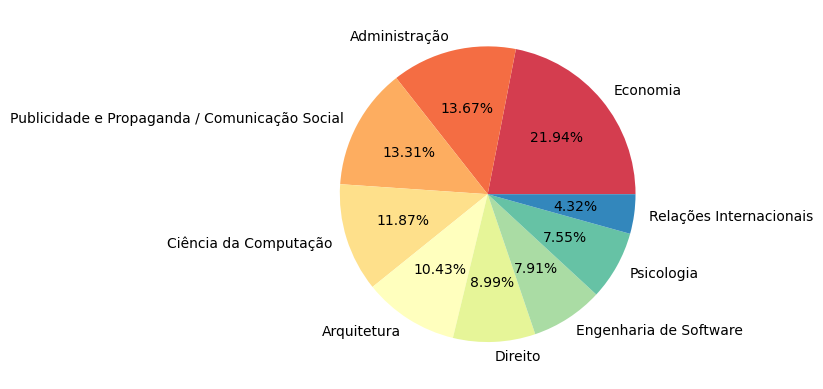

In [47]:
plt.pie(major_count, labels=major_count.index,
        colors=sns.color_palette("Spectral", n_colors=9),
        autopct="%1.2f%%")

In [48]:
gender_count = data["gender"].value_counts()
gender_count

gender
Homem                           140
Mulher                          135
Outro / Prefere não declarar      3
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b3c6cdb950>,
 [Text(-0.012430559954521943, 1.099929761929923, 'Homem'),
  Text(-0.02485932653089292, -1.0997190613445011, 'Mulher'),
  Text(1.0993679188232537, -0.037285105098792806, 'Outro / Prefere não declarar')],
 [Text(-0.006780305429739241, 0.5999616883254125, '50.36%'),
  Text(-0.01355963265321432, -0.5998467607333642, '48.56%'),
  Text(0.5996552284490474, -0.020337330053886982, '1.08%')])

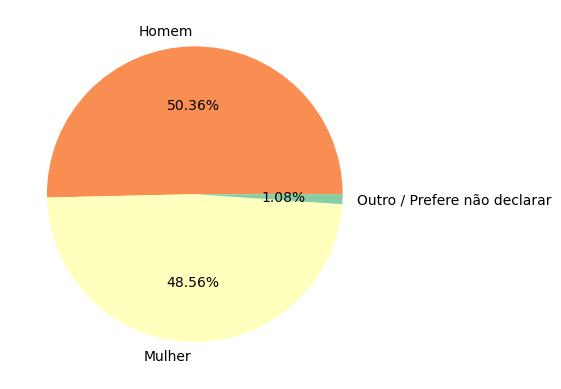

In [49]:
plt.pie(gender_count, labels=gender_count.index,
        colors=sns.color_palette("Spectral", n_colors=3),
        autopct="%1.2f%%")

In [50]:
age_count = data["age_range"].value_counts()
age_count

age_range
18 - 20    144
21 - 25    105
26 - 30     12
+ 35         9
-18          5
31 - 35      3
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b3c6d1fa40>,
 [Text(-0.06212064369151038, 1.098244519962359, '18 - 20'),
  Text(-0.29469432201276163, -1.059790194601478, '21 - 25'),
  Text(0.9546929206792638, -0.5464077481193848, '26 - 30'),
  Text(1.056392356897737, -0.3066515747359611, '+ 35'),
  Text(1.0915121117988016, -0.13638661883234962, '-18'),
  Text(1.0993679135869177, -0.03728525949417243, '31 - 35')],
 [Text(-0.033883987468096566, 0.599042465434014, '51.80%'),
  Text(-0.1607423574615063, -0.5780673788735334, '37.77%'),
  Text(0.5207415930977802, -0.29804058988330073, '4.32%'),
  Text(0.576214012853311, -0.1672644953105242, '3.24%'),
  Text(0.5953702427993462, -0.07439270118128159, '1.80%'),
  Text(0.5996552255928641, -0.0203374142695486, '1.08%')])

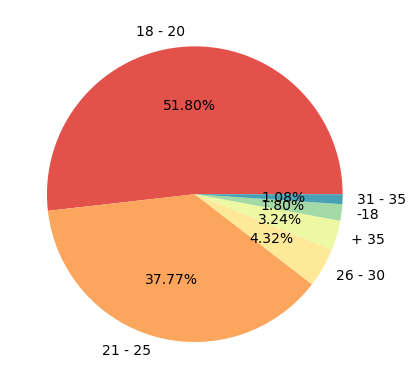

In [51]:
plt.pie(age_count, labels=age_count.index,
        colors=sns.color_palette("Spectral", n_colors=6),
        autopct="%1.2f%%")

In [52]:
data["event_type"] = [i.split(', ') for i in data["event_type"]]
data.head()

,RA,gender,age_range,major,event_type,event_time,comments
0,24101293,Mulher,21 - 25,Economia,"[Workshop / Palestra, Festival Gastronômico de...","Tarde, Noite",NaN
1,24201046,Homem,21 - 25,Economia,"[Workshop / Palestra, Mostra de Cinema]","Tarde, Noite",NaN
2,2111007,Homem,21 - 25,Economia,"[Workshop / Palestra, Festival Gastronômico de...",Noite,eventos clássicos para network com bebida e af...
3,24207310,Homem,21 - 25,Administração,[Festival Gastronômico de Bebidas],Tarde,NaN
4,2311122,Mulher,18 - 20,Economia,"[Workshop / Palestra, Festival Gastronômico de...","Tarde, Noite",NaN


In [53]:
workshop = []
fgbebidas = []
brecho = []
cinema = []
fmusic = []
for i in data["event_type"]:
    if "Workshop / Palestra" in i:
        workshop.append(i)
    if "Festival Gastronômico de Bebidas" in i:
        fgbebidas.append(i)
    if "Brechó Colaborativo" in i:
        brecho.append(i)
    if "Mostra de Cinema" in i:
        cinema.append(i)
    if "Festival de Música" in i:
        fmusic.append(i)

full_event_list = []
for i in range(0,len(workshop)):
    full_event_list.append("Workshop / Palestra")
for i in range(0,len(fgbebidas)):
    full_event_list.append("Festival Gastronômico de Bebidas")
for i in range(0,len(brecho)):
    full_event_list.append("Brechó Colaborativo")
for i in range(0,len(cinema)):
    full_event_list.append("Mostra de Cinema")
for i in range(0,len(fmusic)):
    full_event_list.append("Festival de Música")

events_df = pd.DataFrame({"event_type":["Workshop / Palestra",
                                        "Festival Gastronômico de Bebidas",
                                        "Brechó Colaborativo",
                                        "Mostra de Cinema",
                                        "Festival de Música"],
                          "count":[len(workshop),len(fgbebidas),
                                   len(brecho),len(cinema),len(fmusic)]})
events_df

,event_type,count
0,Workshop / Palestra,97
1,Festival Gastronômico de Bebidas,232
2,Brechó Colaborativo,74
3,Mostra de Cinema,108
4,Festival de Música,134


Text(0.5, 0, 'Count')

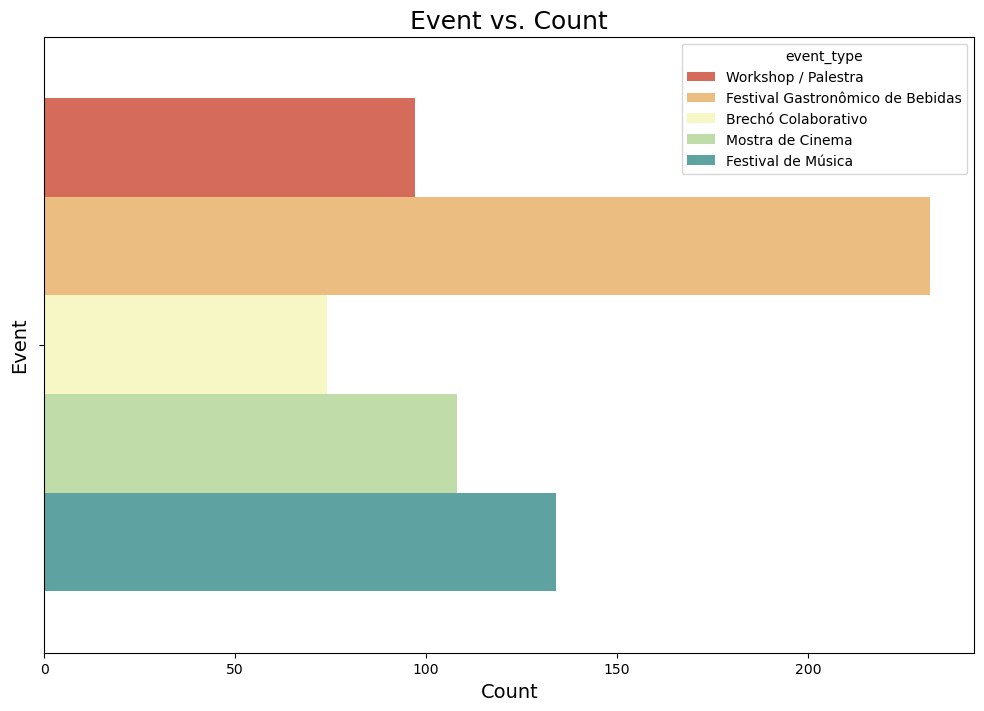

In [54]:
plt.figure(figsize=(12,8))
ax = sns.barplot(events_df,x="count",hue="event_type",palette="Spectral")
ax.axes.set_title("Event vs. Count",fontsize=18)
ax.set_ylabel("Event",fontsize=14)
ax.set_xlabel("Count",fontsize=14)

In [56]:
men = []
for i in data["gender"]:
    if i == "Homem":
        men.append(True)
    else:
        men.append(False)
data["homens"]  = men

women = []
for i in data["gender"]:
    if i == "Mulher":
        women.append(True)
    else:
        women.append(False)
data["mulheres"]  = women

other = []
for i in data["gender"]:
    if i == "Outro / Prefere não declarar":
        other.append(True)
    else:
        other.append(False)
data["outro_gen"]  = other

data.iloc[:,7:10]

,homens,mulheres,outro_gen
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False
...,...,...,...
298,True,False,False
299,True,False,False
300,True,False,False
301,True,False,False


In [57]:
range_1 = []
for i in data["age_range"]:
    if i == "-18":
        range_1.append(True)
    else:
        range_1.append(False)
data["-18"]  = range_1

range_2 = []
for i in data["age_range"]:
    if i == "18 - 20":
        range_2.append(True)
    else:
        range_2.append(False)
data["18 - 20"]  = range_2

range_3 = []
for i in data["age_range"]:
    if i == "21 - 25":
        range_3.append(True)
    else:
        range_3.append(False)
data["21 - 25"]  = range_3

range_4 = []
for i in data["age_range"]:
    if i == "26 - 30":
        range_4.append(True)
    else:
        range_4.append(False)
data["26 - 30"]  = range_4

range_5 = []
for i in data["age_range"]:
    if i == "31 - 35":
        range_5.append(True)
    else:
        range_5.append(False)
data["31 - 35"]  = range_5

range_6 = []
for i in data["age_range"]:
    if i == "+ 35":
        range_6.append(True)
    else:
        range_6.append(False)
data["+ 35"]  = range_6

data.iloc[:,7:16]

,homens,mulheres,outro_gen,-18,18 - 20,21 - 25,26 - 30,31 - 35,+ 35
0,False,True,False,False,False,True,False,False,False
1,True,False,False,False,False,True,False,False,False
2,True,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,False
4,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
298,True,False,False,False,False,True,False,False,False
299,True,False,False,False,False,True,False,False,False
300,True,False,False,False,True,False,False,False,False
301,True,False,False,False,True,False,False,False,False


In [58]:
major_1 = []
for i in data["major"]:
    if i == "Direito":
        major_1.append(True)
    else:
        major_1.append(False)
data["Dir"]  = major_1

major_2 = []
for i in data["major"]:
    if i == "Publicidade e Propaganda / Comunicação Social":
        major_2.append(True)
    else:
        major_2.append(False)
data["Publi"]  = major_2

major_3 = []
for i in data["major"]:
    if i == "Economia":
        major_3.append(True)
    else:
        major_3.append(False)
data["Econ"]  = major_3

major_4 = []
for i in data["major"]:
    if i == "Administração":
        major_4.append(True)
    else:
        major_4.append(False)
data["ADM"]  = major_4

major_5 = []
for i in data["major"]:
    if i == "Relações Internacionais":
        major_5.append(True)
    else:
        major_5.append(False)
data["Rel"]  = major_5

major_6 = []
for i in data["major"]:
    if i == "Arquitetura":
        major_6.append(True)
    else:
        major_6.append(False)
data["Arq"]  = major_6

major_7 = []
for i in data["major"]:
    if i == "Ciência da Computação":
        major_7.append(True)
    else:
        major_7.append(False)
data["CC"]  = major_7

major_8 = []
for i in data["major"]:
    if i == "Psicologia":
        major_8.append(True)
    else:
        major_8.append(False)
data["Psicologia"]  = major_8

major_9 = []
for i in data["major"]:
    if i == "Engenharia de Software":
        major_9.append(True)
    else:
        major_9.append(False)
data["ES"]  = major_9

data.iloc[:,7:25]

,homens,mulheres,outro_gen,-18,18 - 20,21 - 25,26 - 30,31 - 35,+ 35,Dir,Publi,Econ,ADM,Rel,Arq,CC,Psicologia,ES
0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
299,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
300,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
301,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [59]:
morning = []
for i in data["event_time"]:
    if "Manhã" in i:
        morning.append(True)
    else:
        morning.append(False)
data["Manhã"] = morning

afternoon = []
for i in data["event_time"]:
    if "Tarde" in i:
        afternoon.append(True)
    else:
        afternoon.append(False)
data["Tarde"] = afternoon

night = []
for i in data["event_time"]:
    if "Noite" in i:
        night.append(True)
    else:
        night.append(False)
data["Noite"] = night

data.iloc[:,7:28]

,homens,mulheres,outro_gen,-18,18 - 20,21 - 25,26 - 30,31 - 35,+ 35,Dir,...,Econ,ADM,Rel,Arq,CC,Psicologia,ES,Manhã,Tarde,Noite
0,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
299,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
300,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
301,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [60]:
event_1 = []
for i in data["event_type"]:
    if "Workshop / Palestra" in i:
        event_1.append(True)
    else:
        event_1.append(False)
data["Acadêmico"]  = event_1

event_2 = []
for i in data["event_type"]:
    if "Festival Gastronômico de Bebidas" in i:
        event_2.append(True)
    else:
        event_2.append(False)
data["FG Bebidas"]  = event_2

event_3 = []
for i in data["event_type"]:
    if "Brechó Colaborativo" in i:
        event_3.append(True)
    else:
        event_3.append(False)
data["Brechó"]  = event_3

event_4 = []
for i in data["event_type"]:
    if "Mostra de Cinema" in i:
        event_4.append(True)
    else:
        event_4.append(False)
data["Cinema"]  = event_4

event_5 = []
for i in data["event_type"]:
    if "Festival de Música" in i:
        event_5.append(True)
    else:
        event_5.append(False)
data["FM"]  = event_5

data.iloc[:,7:33]

,homens,mulheres,outro_gen,-18,18 - 20,21 - 25,26 - 30,31 - 35,+ 35,Dir,...,Psicologia,ES,Manhã,Tarde,Noite,Acadêmico,FG Bebidas,Brechó,Cinema,FM
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
1,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,True,True,False,False,True,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,True,False,True,True
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,True,False,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,True,False,False,True
299,True,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,True,True,True,True,True
300,True,False,False,False,True,False,False,False,False,False,...,False,True,True,True,True,True,False,False,True,False
301,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False


<Axes: >

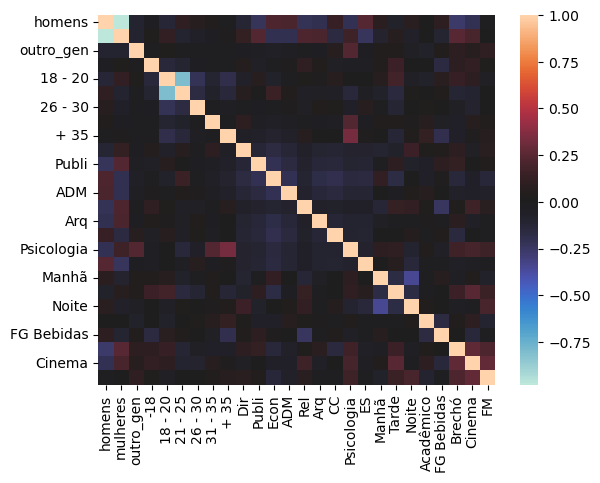

In [61]:
data_bools = data.iloc[:, 7:33]

corr_matrix = data_bools.corr(numeric_only=True)
sns.heatmap(corr_matrix,
            cmap=sns.color_palette("icefire", as_cmap=True))

looks like absolute shit...

In [62]:
corr_matrix

,homens,mulheres,outro_gen,-18,18 - 20,21 - 25,26 - 30,31 - 35,+ 35,Dir,...,Psicologia,ES,Manhã,Tarde,Noite,Acadêmico,FG Bebidas,Brechó,Cinema,FM
homens,1.000000,-0.978641,-0.105201,-0.028041,-0.122643,0.105692,0.069273,0.034065,-0.021640,-0.115430,...,-0.206243,0.237748,0.087503,-0.078851,0.078851,0.017375,0.100006,-0.264787,-0.212383,-0.021338
mulheres,-0.978641,1.000000,-0.101483,0.030974,0.116266,-0.103758,-0.064714,-0.031823,0.025598,0.122262,...,0.158024,-0.231511,-0.096957,0.068969,-0.068969,-0.001575,-0.109660,0.245324,0.200143,-0.001036
outro_gen,-0.105201,-0.101483,1.000000,-0.014135,0.031079,-0.009558,-0.022184,-0.010909,-0.019105,-0.032833,...,0.233638,-0.030619,0.045567,0.047950,-0.047950,-0.076461,0.046508,0.094643,0.059611,0.108274
-18,-0.028041,0.030974,-0.014135,1.000000,-0.140292,-0.105433,-0.028744,-0.014135,-0.024754,0.052071,...,-0.038685,-0.039673,0.040905,0.153033,0.010595,0.014503,-0.158251,0.102216,0.114260,0.031955
18 - 20,-0.122643,0.116266,0.031079,-0.140292,1.000000,-0.807608,-0.220180,-0.108274,-0.189616,-0.074225,...,0.003332,0.016116,0.061529,0.185769,-0.055209,-0.079213,0.074146,0.141206,0.089469,-0.049129
21 - 25,0.105692,-0.103758,-0.009558,-0.105433,-0.807608,1.000000,-0.165471,-0.081370,-0.142501,0.066332,...,-0.138466,-0.035988,-0.077741,-0.150698,0.031086,0.005656,0.047403,-0.116670,-0.103383,0.005769
26 - 30,0.069273,-0.064714,-0.022184,-0.028744,-0.220180,-0.165471,1.000000,-0.022184,-0.038850,-0.004896,...,-0.060715,0.068868,-0.014079,-0.116496,0.009494,0.030189,-0.000685,-0.047827,-0.096664,0.007645
31 - 35,0.034065,-0.031823,-0.010909,-0.014135,-0.108274,-0.081370,-0.022184,1.000000,-0.019105,0.088867,...,0.233638,-0.030619,0.045567,0.047950,0.022208,0.069630,-0.047182,-0.062906,0.059611,0.038598
+ 35,-0.021640,0.025598,-0.019105,-0.024754,-0.189616,-0.142501,-0.038850,-0.019105,1.000000,-0.057498,...,0.332253,0.021665,-0.001910,-0.120802,0.038892,0.121940,-0.192013,-0.064181,0.020999,0.067594
Dir,-0.115430,0.122262,-0.032833,0.052071,-0.074225,0.066332,-0.004896,0.088867,-0.057498,1.000000,...,-0.089857,-0.092151,-0.107197,-0.075285,0.151299,0.033688,0.038462,0.095175,-0.044171,0.074225


In [63]:
freq_items = apriori(data_bools, min_support=0.25, use_colnames=True)
freq_items

,support,itemsets
0,0.503597,(homens)
1,0.485612,(mulheres)
2,0.517986,(18 - 20)
3,0.377698,(21 - 25)
4,0.449640,(Manhã)
5,0.438849,(Tarde)
6,0.561151,(Noite)
7,0.348921,(Acadêmico)
8,0.834532,(FG Bebidas)
9,0.266187,(Brechó)


In [64]:
associations = association_rules(freq_items, metric="confidence",
                                 min_threshold=0.5)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Noite),(homens),0.561151,0.503597,0.302158,0.538462,1.069231,0.019564,1.075540,0.147541
1,(homens),(Noite),0.503597,0.561151,0.302158,0.600000,1.069231,0.019564,1.097122,0.130435
2,(FG Bebidas),(homens),0.834532,0.503597,0.438849,0.525862,1.044212,0.018581,1.046959,0.255880
3,(homens),(FG Bebidas),0.503597,0.834532,0.438849,0.871429,1.044212,0.018581,1.286970,0.085293
4,(18 - 20),(mulheres),0.517986,0.485612,0.280576,0.541667,1.115432,0.029036,1.122302,0.214696
5,(mulheres),(18 - 20),0.485612,0.517986,0.280576,0.577778,1.115432,0.029036,1.141613,0.201183
6,(mulheres),(Noite),0.485612,0.561151,0.255396,0.525926,0.937227,-0.017106,0.925697,-0.115207
7,(mulheres),(FG Bebidas),0.485612,0.834532,0.384892,0.792593,0.949745,-0.020366,0.797790,-0.093274
8,(18 - 20),(Tarde),0.517986,0.438849,0.273381,0.527778,1.202641,0.046064,1.188320,0.349568
9,(Tarde),(18 - 20),0.438849,0.517986,0.273381,0.622951,1.202641,0.046064,1.278386,0.300270


In [65]:
associations = associations.sort_values(by="confidence", ignore_index=True,
                                        ascending=False)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(homens),(FG Bebidas),0.503597,0.834532,0.438849,0.871429,1.044212,0.018581,1.286970,0.085293
1,(Manhã),(FG Bebidas),0.449640,0.834532,0.388489,0.864000,1.035310,0.013250,1.216674,0.061970
2,(18 - 20),(FG Bebidas),0.517986,0.834532,0.446043,0.861111,1.031849,0.013767,1.191367,0.064035
3,"(Noite, homens)",(FG Bebidas),0.302158,0.834532,0.258993,0.857143,1.027094,0.006832,1.158273,0.037801
4,(21 - 25),(FG Bebidas),0.377698,0.834532,0.323741,0.857143,1.027094,0.008540,1.158273,0.042389
5,"(Noite, FM)",(FG Bebidas),0.320144,0.834532,0.269784,0.842697,1.009783,0.002614,1.051901,0.014250
6,(Tarde),(FG Bebidas),0.438849,0.834532,0.366906,0.836066,1.001837,0.000673,1.009353,0.003268
7,(Noite),(FG Bebidas),0.561151,0.834532,0.467626,0.833333,0.998563,-0.000673,0.992806,-0.003268
8,(FM),(FG Bebidas),0.482014,0.834532,0.399281,0.828358,0.992602,-0.002976,0.964029,-0.014185
9,(mulheres),(FG Bebidas),0.485612,0.834532,0.384892,0.792593,0.949745,-0.020366,0.797790,-0.093274


In [66]:
higher_lift = associations[associations["lift"] > 1]
higher_lift = higher_lift.reset_index()
higher_lift

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,0,(homens),(FG Bebidas),0.503597,0.834532,0.438849,0.871429,1.044212,0.018581,1.286970,0.085293
1,1,(Manhã),(FG Bebidas),0.449640,0.834532,0.388489,0.864000,1.035310,0.013250,1.216674,0.061970
2,2,(18 - 20),(FG Bebidas),0.517986,0.834532,0.446043,0.861111,1.031849,0.013767,1.191367,0.064035
3,3,"(Noite, homens)",(FG Bebidas),0.302158,0.834532,0.258993,0.857143,1.027094,0.006832,1.158273,0.037801
4,4,(21 - 25),(FG Bebidas),0.377698,0.834532,0.323741,0.857143,1.027094,0.008540,1.158273,0.042389
5,5,"(Noite, FM)",(FG Bebidas),0.320144,0.834532,0.269784,0.842697,1.009783,0.002614,1.051901,0.014250
6,6,(Tarde),(FG Bebidas),0.438849,0.834532,0.366906,0.836066,1.001837,0.000673,1.009353,0.003268
7,12,"(FG Bebidas, FM)",(Noite),0.399281,0.561151,0.269784,0.675676,1.204089,0.045727,1.353118,0.282156
8,13,(FM),(Noite),0.482014,0.561151,0.320144,0.664179,1.183601,0.049661,1.306795,0.299469
9,14,(Cinema),(FM),0.388489,0.482014,0.255396,0.657407,1.363875,0.068138,1.511958,0.436288


In [67]:
target_range_1 = data[data["age_range"] == "18 - 20"]
target_range_2 = data[data["age_range"] == "21 - 25"]

target_range_full = pd.concat([target_range_1,target_range_2],
                              ignore_index=True)
target_range_full

,RA,gender,age_range,major,event_type,event_time,comments,homens,mulheres,outro_gen,...,Psicologia,ES,Manhã,Tarde,Noite,Acadêmico,FG Bebidas,Brechó,Cinema,FM
0,2311122,Mulher,18 - 20,Economia,"[Workshop / Palestra, Festival Gastronômico de...","Tarde, Noite",NaN,False,True,False,...,False,False,False,True,True,True,True,True,True,True
1,24201030,Homem,18 - 20,Ciência da Computação,"[Festival Gastronômico de Bebidas, Brechó Cola...","Tarde, Noite",NaN,True,False,False,...,False,False,False,True,True,False,True,True,False,True
2,24101384,Mulher,18 - 20,Ciência da Computação,"[Festival Gastronômico de Bebidas, Mostra de C...",Tarde,NaN,False,True,False,...,False,False,False,True,False,False,True,False,True,True
3,24101066,Mulher,18 - 20,Publicidade e Propaganda / Comunicação Social,"[Festival Gastronômico de Bebidas, Mostra de C...","Manhã, Tarde, Noite",NaN,False,True,False,...,False,False,True,True,True,False,True,False,True,True
4,24101324,Mulher,18 - 20,Publicidade e Propaganda / Comunicação Social,"[Festival Gastronômico de Bebidas, Brechó Cola...",Manhã,NaN,False,True,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,24101038,Homem,21 - 25,Publicidade e Propaganda / Comunicação Social,[Festival Gastronômico de Bebidas],Manhã,NaN,True,False,False,...,False,False,True,False,False,False,True,False,False,False
245,24201108,Homem,21 - 25,Engenharia de Software,[Festival Gastronômico de Bebidas],Tarde,Um dj daora👍,True,False,False,...,False,True,False,True,False,False,True,False,False,False
246,2211298,Homem,21 - 25,Ciência da Computação,"[Festival Gastronômico de Bebidas, Festival de...","Manhã, Tarde",NaN,True,False,False,...,False,False,True,True,False,False,True,False,False,True
247,24201134,Homem,21 - 25,Engenharia de Software,"[Workshop / Palestra, Festival Gastronômico de...",Tarde,NaN,True,False,False,...,False,True,False,True,False,True,True,True,True,True


In [69]:
targeted = target_range_full[target_range_full["FG Bebidas"] == True]
targeted

,RA,gender,age_range,major,event_type,event_time,comments,homens,mulheres,outro_gen,...,Psicologia,ES,Manhã,Tarde,Noite,Acadêmico,FG Bebidas,Brechó,Cinema,FM
0,2311122,Mulher,18 - 20,Economia,"[Workshop / Palestra, Festival Gastronômico de...","Tarde, Noite",NaN,False,True,False,...,False,False,False,True,True,True,True,True,True,True
1,24201030,Homem,18 - 20,Ciência da Computação,"[Festival Gastronômico de Bebidas, Brechó Cola...","Tarde, Noite",NaN,True,False,False,...,False,False,False,True,True,False,True,True,False,True
2,24101384,Mulher,18 - 20,Ciência da Computação,"[Festival Gastronômico de Bebidas, Mostra de C...",Tarde,NaN,False,True,False,...,False,False,False,True,False,False,True,False,True,True
3,24101066,Mulher,18 - 20,Publicidade e Propaganda / Comunicação Social,"[Festival Gastronômico de Bebidas, Mostra de C...","Manhã, Tarde, Noite",NaN,False,True,False,...,False,False,True,True,True,False,True,False,True,True
4,24101324,Mulher,18 - 20,Publicidade e Propaganda / Comunicação Social,"[Festival Gastronômico de Bebidas, Brechó Cola...",Manhã,NaN,False,True,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,24101038,Homem,21 - 25,Publicidade e Propaganda / Comunicação Social,[Festival Gastronômico de Bebidas],Manhã,NaN,True,False,False,...,False,False,True,False,False,False,True,False,False,False
245,24201108,Homem,21 - 25,Engenharia de Software,[Festival Gastronômico de Bebidas],Tarde,Um dj daora👍,True,False,False,...,False,True,False,True,False,False,True,False,False,False
246,2211298,Homem,21 - 25,Ciência da Computação,"[Festival Gastronômico de Bebidas, Festival de...","Manhã, Tarde",NaN,True,False,False,...,False,False,True,True,False,False,True,False,False,True
247,24201134,Homem,21 - 25,Engenharia de Software,"[Workshop / Palestra, Festival Gastronômico de...",Tarde,NaN,True,False,False,...,False,True,False,True,False,True,True,True,True,True


In [70]:
major_count = targeted["major"].value_counts()
major_count

major
Economia                                         50
Publicidade e Propaganda / Comunicação Social    34
Administração                                    30
Ciência da Computação                            26
Direito                                          20
Arquitetura                                      20
Engenharia de Software                           16
Psicologia                                       13
Relações Internacionais                           5
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b3c70afda0>,
 [Text(0.8167385627750345, 0.7368433483965035, 'Economia'),
  Text(-0.42467871038422755, 1.0147157202617831, 'Publicidade e Propaganda / Comunicação Social'),
  Text(-1.0697951143285256, 0.2560047135480457, 'Administração'),
  Text(-0.915736460224816, -0.609447893929353, 'Ciência da Computação'),
  Text(-0.3337696244475497, -1.048140180412974, 'Direito'),
  Text(0.30285616713251373, -1.0574867100960668, 'Arquitetura'),
  Text(0.7947554636296151, -0.7605023031068846, 'Engenharia de Software'),
  Text(1.0378901418339976, -0.3643954630395451, 'Psicologia'),
  Text(1.097038037958371, -0.0806693453081617, 'Relações Internacionais')],
 [Text(0.44549376151365516, 0.40191455367082, '23.36%'),
  Text(-0.23164293293685137, 0.5534813019609726, '15.89%'),
  Text(-0.5835246078155594, 0.13963893466257035, '14.02%'),
  Text(-0.4994926146680814, -0.3324261239614652, '12.15%'),
  Text(-0.18205615878957257, -0.571712825679804, '9.35%'),
  Text(0.16519427298

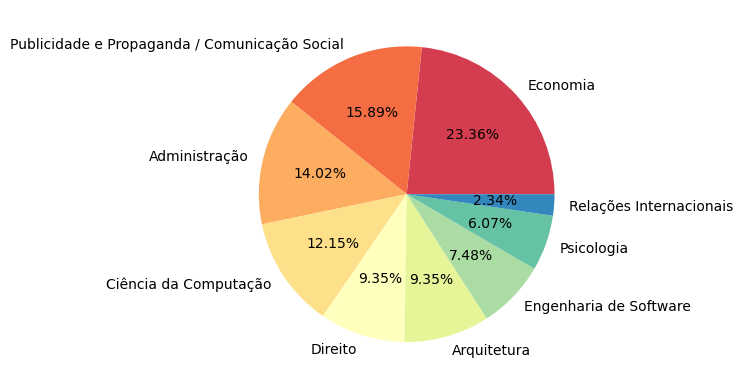

In [71]:
plt.pie(major_count, labels=major_count.index,
        colors=sns.color_palette("Spectral", n_colors=9),
        autopct="%1.2f%%")

In [72]:
gender_count = targeted["gender"].value_counts()
gender_count

gender
Homem                           109
Mulher                          102
Outro / Prefere não declarar      3
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b3c6c5f230>,
 [Text(-0.03229202220871307, 1.099525909336234, 'Homem'),
  Text(-0.016147957040687156, -1.0998814679243452, 'Mulher'),
  Text(1.0989333791795783, -0.04842962032633833, 'Outro / Prefere não declarar')],
 [Text(-0.017613830295661673, 0.5997414050924912, '50.93%'),
  Text(-0.008807976567647539, -0.5999353461405519, '47.66%'),
  Text(0.5994182068252245, -0.026416156541639087, '1.40%')])

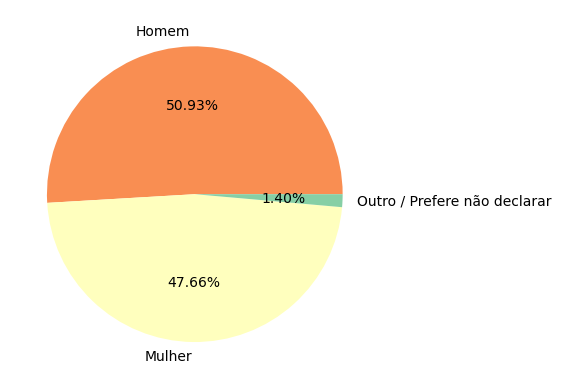

In [73]:
plt.pie(gender_count, labels=gender_count.index,
        colors=sns.color_palette("Spectral", n_colors=3),
        autopct="%1.2f%%")

In [74]:
targeted_bools = targeted.iloc[:,7:33]

freq_items = apriori(targeted_bools, min_support=0.25, use_colnames=True)
freq_items

,support,itemsets
0,0.509346,(homens)
1,0.476636,(mulheres)
2,0.579439,(18 - 20)
3,0.420561,(21 - 25)
4,0.462617,(Manhã)
5,0.443925,(Tarde)
6,0.560748,(Noite)
7,0.294393,(Acadêmico)
8,1.000000,(FG Bebidas)
9,0.275701,(Brechó)


In [75]:
associations = association_rules(freq_items, metric="confidence",
                                 min_threshold=0.5)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(homens),(18 - 20),0.509346,0.579439,0.266355,0.522936,0.902486,-0.028780,0.881560,-0.180474
1,(homens),(Manhã),0.509346,0.462617,0.261682,0.513761,1.110555,0.026050,1.105184,0.202891
2,(Manhã),(homens),0.462617,0.509346,0.261682,0.565657,1.110555,0.026050,1.129646,0.185248
3,(Noite),(homens),0.560748,0.509346,0.299065,0.533333,1.047095,0.013451,1.051402,0.102394
4,(homens),(Noite),0.509346,0.560748,0.299065,0.587156,1.047095,0.013451,1.063967,0.091667
...,...,...,...,...,...,...,...,...,...,...
78,"(Noite, FM)",(FG Bebidas),0.317757,1.000000,0.317757,1.000000,1.000000,0.000000,inf,0.000000
79,"(Noite, FG Bebidas)",(FM),0.560748,0.471963,0.317757,0.566667,1.200660,0.053105,1.218548,0.380476
80,"(FG Bebidas, FM)",(Noite),0.471963,0.560748,0.317757,0.673267,1.200660,0.053105,1.344378,0.316502
81,(Noite),"(FG Bebidas, FM)",0.560748,0.471963,0.317757,0.566667,1.200660,0.053105,1.218548,0.380476


In [76]:
associations = associations.sort_values(by="confidence", ignore_index=True,
                                        ascending=False)
associations

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Noite, homens)",(FG Bebidas),0.299065,1.000000,0.299065,1.000000,1.000000,0.000000,inf,0.000000
1,"(18 - 20, mulheres)",(FG Bebidas),0.303738,1.000000,0.303738,1.000000,1.000000,0.000000,inf,0.000000
2,(Brechó),(FG Bebidas),0.275701,1.000000,0.275701,1.000000,1.000000,0.000000,inf,0.000000
3,(Noite),(FG Bebidas),0.560748,1.000000,0.560748,1.000000,1.000000,0.000000,inf,0.000000
4,(Cinema),(FG Bebidas),0.364486,1.000000,0.364486,1.000000,1.000000,0.000000,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
78,"(18 - 20, FG Bebidas)",(Tarde),0.579439,0.443925,0.299065,0.516129,1.162649,0.041838,1.149221,0.332639
79,(homens),"(FG Bebidas, Manhã)",0.509346,0.462617,0.261682,0.513761,1.110555,0.026050,1.105184,0.202891
80,"(FG Bebidas, homens)",(Manhã),0.509346,0.462617,0.261682,0.513761,1.110555,0.026050,1.105184,0.202891
81,(homens),(Manhã),0.509346,0.462617,0.261682,0.513761,1.110555,0.026050,1.105184,0.202891


In [77]:
higher_lift = associations[associations["lift"] > 1]
higher_lift = higher_lift.reset_index()
higher_lift

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,23,"(FG Bebidas, Tarde)",(18 - 20),0.443925,0.579439,0.299065,0.673684,1.162649,0.041838,1.288815,0.251576
1,24,(Tarde),"(18 - 20, FG Bebidas)",0.443925,0.579439,0.299065,0.673684,1.162649,0.041838,1.288815,0.251576
2,25,(Tarde),(18 - 20),0.443925,0.579439,0.299065,0.673684,1.162649,0.041838,1.288815,0.251576
3,26,(FM),(Noite),0.471963,0.560748,0.317757,0.673267,1.200660,0.053105,1.344378,0.316502
4,27,"(FG Bebidas, FM)",(Noite),0.471963,0.560748,0.317757,0.673267,1.200660,0.053105,1.344378,0.316502
5,28,(FM),"(Noite, FG Bebidas)",0.471963,0.560748,0.317757,0.673267,1.200660,0.053105,1.344378,0.316502
6,29,(mulheres),(18 - 20),0.476636,0.579439,0.303738,0.637255,1.099779,0.027557,1.159384,0.173352
7,30,(mulheres),"(18 - 20, FG Bebidas)",0.476636,0.579439,0.303738,0.637255,1.099779,0.027557,1.159384,0.173352
8,31,"(FG Bebidas, mulheres)",(18 - 20),0.476636,0.579439,0.303738,0.637255,1.099779,0.027557,1.159384,0.173352
9,32,"(FG Bebidas, Manhã)",(18 - 20),0.462617,0.579439,0.285047,0.616162,1.063376,0.016988,1.095671,0.110905
